# ~>Data Cleaning

In [1]:
import pandas as pd
df_data_1 = pd.read_csv("Dataset.csv")

# Missing Value

In [2]:
import numpy as np
df_data_1['accessedNodeType'] = df_data_1['accessedNodeType'].fillna(value='/Malicious')

# Unexpected Values

In [3]:
df_data_1.loc[df_data_1.value=='twenty',"value"] = '20.0'
df_data_1.loc[df_data_1.value=='false',"value"] = '0'
df_data_1.loc[df_data_1.value=='true',"value"] = '1'
df_data_1.loc[df_data_1.value=='none',"value"] = '0'
df_data_1.loc[df_data_1.value=='0',"value"] = '0.0'
df_data_1['value'] = df_data_1['value'].fillna(value='60.0')
df_data_1 = df_data_1.drop(df_data_1.index[df_data_1.value.str.contains("org.*")])
df_data_1.value = df_data_1.value.astype(float)

# Cleaned Data

In [4]:
df_data_1.head()

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,0.0,1520031600000,normal
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,0.0,1520031603269,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,0.0,1520031603279,normal
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,0.0,1520031603290,normal
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,0.0,1520031603464,normal


# Frequency Distribution Visualization

In [5]:
import matplotlib.pyplot as plt
import random
import numpy as np

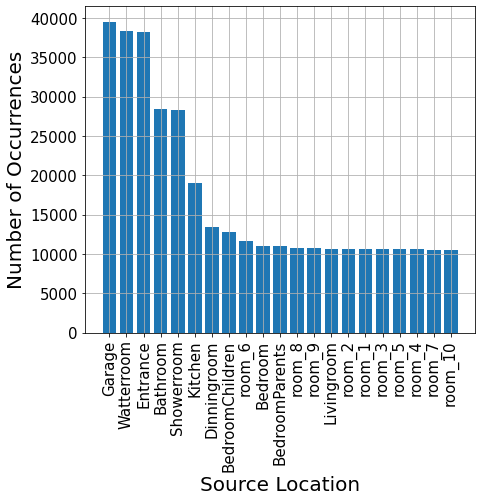

In [6]:
source_loc_count = df_data_1.sourceLocation.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.bar(source_loc_count.index, source_loc_count.values)
plt.grid()
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Source Location', fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [7]:
for i,j in zip(source_loc_count.index,source_loc_count.values):
    print(i,j)

Garage 39499
Watterroom 38368
Entrance 38217
Bathroom 28461
Showerroom 28315
Kitchen 18962
Dinningroom 13429
BedroomChildren 12836
room_6 11642
Bedroom 11009
BedroomParents 10946
room_8 10798
room_9 10752
Livingroom 10620
room_2 10606
room_1 10601
room_3 10597
room_5 10596
room_4 10572
room_7 10558
room_10 10557


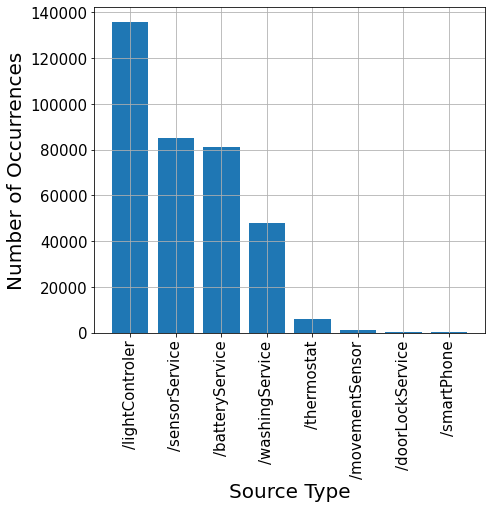

In [8]:
source_type_count = df_data_1.sourceType.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(source_type_count.index, source_type_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Source Type', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [9]:
for i in source_type_count.index:
    print(i)

/lightControler
/sensorService
/batteryService
/washingService
/thermostat
/movementSensor
/doorLockService
/smartPhone


In [10]:
for i in source_type_count.values:
    print(i)

135775
85196
81267
47986
5980
1301
330
106


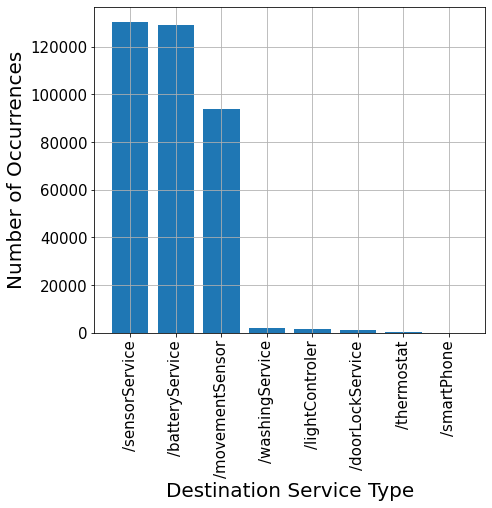

In [11]:
destination_type_count = df_data_1.destinationServiceType.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(destination_type_count.index, destination_type_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Destination Service Type', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [12]:
for i in destination_type_count.index:
    print(i)

/sensorService
/batteryService
/movementSensor
/washingService
/lightControler
/doorLockService
/thermostat
/smartPhone


In [13]:
for i in destination_type_count.values:
    print(i)

130313
129119
93645
1805
1694
1043
319
3


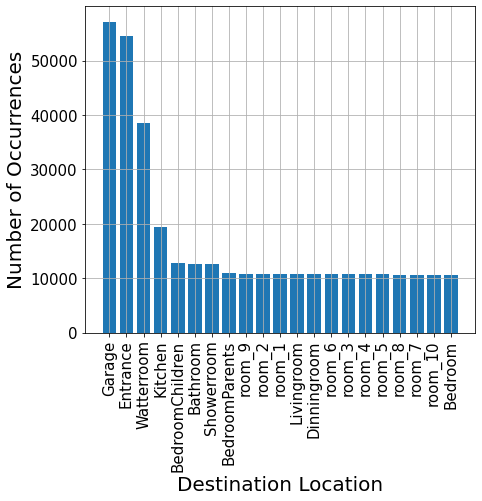

In [14]:
destination_location_count = df_data_1.destinationLocation.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(destination_location_count.index, destination_location_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Destination Location', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [15]:
for i in destination_location_count.index:
    print(i)

Garage
Entrance
Watterroom
Kitchen
BedroomChildren
Bathroom
Showerroom
BedroomParents
room_9
room_2
room_1
Livingroom
Dinningroom
room_6
room_3
room_4
room_5
room_8
room_7
room_10
Bedroom


In [16]:
for i in destination_location_count.values:
    print(i)

57100
54448
38524
19437
12768
12684
12583
10938
10843
10828
10805
10781
10759
10741
10732
10708
10687
10651
10649
10648
10627


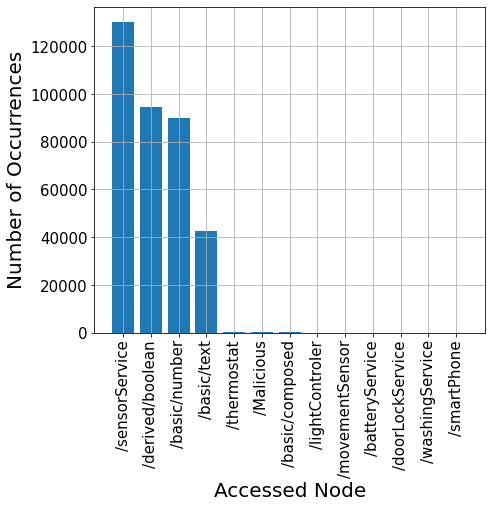

In [17]:
accessed_node_count = df_data_1.accessedNodeType.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(accessed_node_count.index, accessed_node_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Accessed Node', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [18]:
for i in accessed_node_count.index:
    print(i)

/sensorService
/derived/boolean
/basic/number
/basic/text
/thermostat
/Malicious
/basic/composed
/lightControler
/movementSensor
/batteryService
/doorLockService
/washingService
/smartPhone


In [19]:
for i in accessed_node_count.values:
    print(i)

130155
94725
90010
42428
313
148
100
23
22
6
5
3
3


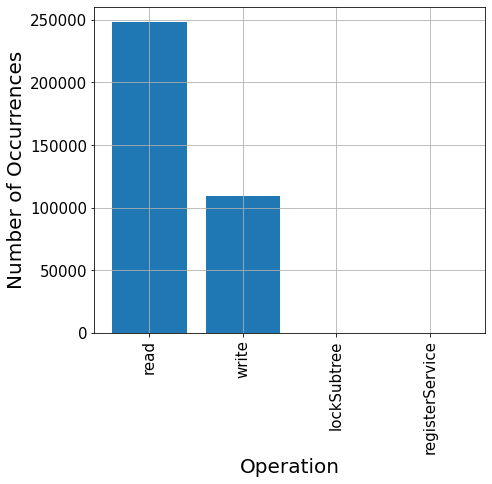

In [20]:
operation_count = df_data_1.operation.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(operation_count.index, operation_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Operation', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [21]:
for i in operation_count.index:
    print(i)

read
write
lockSubtree
registerService


In [22]:
for i in operation_count.values:
    print(i)

248061
109648
148
84


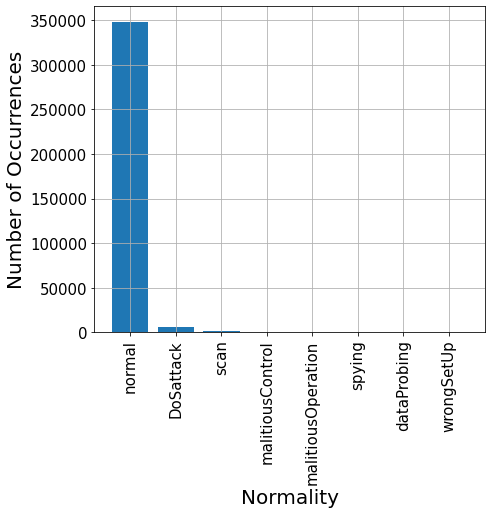

In [23]:
normality_count = df_data_1.normality.value_counts()
indices = ['normal', 'DoSattack', 'scan', 'malitiousControl', 'malitiousOperation', 'spying', 'dataProbing', 'wrongSetUp']
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(indices, normality_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Normality', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [24]:
for i in normality_count.index:
    print(i)

normal
anomalous(DoSattack)
anomalous(scan)
anomalous(malitiousControl)
anomalous(malitiousOperation)
anomalous(spying)
anomalous(dataProbing)
anomalous(wrongSetUp)


In [25]:
for i in normality_count.values:
    print(i)

347924
5780
1547
889
805
532
342
122


# Making Features

In [26]:
df_1 = df_data_1.drop('timestamp',axis=1)

In [27]:
from sklearn.preprocessing import LabelEncoder
labelencoder0 = LabelEncoder()
labelencoder1 = LabelEncoder()
labelencoder4 = LabelEncoder()
labelencoder7 = LabelEncoder()
labelencodery = LabelEncoder()

In [28]:
X_0 = df_1.iloc[:,0].values
X_1 = df_1.iloc[:,1].values
X_4 = df_1.iloc[:,4].values
X_7 = df_1.iloc[:,7].values
y = df_1.iloc[:,11].values

In [29]:
X_0 = labelencoder0.fit_transform(X_0)
X_0 = X_0.reshape(len(X_0),1)
X_1 = labelencoder1.fit_transform(X_1)
X_1 = X_1.reshape(len(X_1),1)
X_4 = labelencoder4.fit_transform(X_4)
X_4 = X_4.reshape(len(X_4),1)
X_7 = labelencoder7.fit_transform(X_7)
X_7 = X_7.reshape(len(X_7),1)
y = labelencodery.fit_transform(y)

In [30]:
from sklearn.preprocessing import OneHotEncoder
ohe_2 = OneHotEncoder()
ohe_3 = OneHotEncoder()
ohe_5 = OneHotEncoder()
ohe_6 = OneHotEncoder()
ohe_8 = OneHotEncoder()
ohe_9 = OneHotEncoder()
le_2 = LabelEncoder()
le_3 = LabelEncoder()
le_5 = LabelEncoder()
le_6 = LabelEncoder()
le_8 = LabelEncoder()
le_9 = LabelEncoder()

In [31]:
X_2 = df_1.iloc[:,2].values
X_3 = df_1.iloc[:,3].values
X_5 = df_1.iloc[:,5].values
X_6 = df_1.iloc[:,6].values
X_8 = df_1.iloc[:,8].values
X_9 = df_1.iloc[:,9].values
X_10 = df_1.iloc[:,10].values

In [32]:
X_2 = le_2.fit_transform(X_2)
X_2 = X_2.reshape(len(X_2),1)
#X_2 = ohe_2.fit_transform(X_2)
X_3 = le_3.fit_transform(X_3)
X_3 = X_3.reshape(len(X_3),1)
#X_3 = ohe_3.fit_transform(X_3)
X_5 = le_5.fit_transform(X_5)
X_5 = X_5.reshape(len(X_5),1)
#X_5 = ohe_5.fit_transform(X_5)
X_6 = le_6.fit_transform(X_6)
X_6 = X_6.reshape(len(X_6),1)
#X_6 = ohe_6.fit_transform(X_6)
X_8 = le_8.fit_transform(X_8)
X_8 = X_8.reshape(len(X_8),1)
#X_8 = ohe_8.fit_transform(X_8)
X_9 = le_9.fit_transform(X_9)
X_9 = X_9.reshape(len(X_9),1)
#X_9 = ohe_9.fit_transform(X_9)
X_10 = X_10.reshape(len(X_10),1)

In [33]:
X = np.concatenate((X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10),axis=1)

In [34]:
labelencodery.classes_

array(['anomalous(DoSattack)', 'anomalous(dataProbing)',
       'anomalous(malitiousControl)', 'anomalous(malitiousOperation)',
       'anomalous(scan)', 'anomalous(spying)', 'anomalous(wrongSetUp)',
       'normal'], dtype=object)

In [35]:
labelencodery.transform(['anomalous(dataProbing)'])

array([1])

In [36]:
y_resized = y.reshape(len(y),1)

In [37]:
df_spark = np.concatenate((y_resized,X),axis=1)

In [38]:
df_spark = pd.DataFrame(df_spark)

In [39]:
df_spark.to_csv('DF_Spark.csv')

# next

In [40]:
df_spark = pd.read_csv('df_spark.csv')

In [41]:
df_spark.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11
0,0,7.0,21.0,30.0,2.0,3.0,30.0,2.0,3.0,59.0,7.0,2.0,0.0
1,1,7.0,32.0,70.0,2.0,4.0,68.0,2.0,4.0,134.0,7.0,2.0,0.0
2,2,7.0,15.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,7.0,2.0,0.0
3,3,7.0,33.0,77.0,2.0,7.0,73.0,2.0,7.0,144.0,7.0,2.0,0.0
4,4,7.0,55.0,78.0,3.0,7.0,74.0,3.0,7.0,146.0,8.0,2.0,0.0


In [42]:
df_spark = df_spark.drop(columns="Unnamed: 0")

In [43]:
df_spark.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.0,21.0,30.0,2.0,3.0,30.0,2.0,3.0,59.0,7.0,2.0,0.0
1,7.0,32.0,70.0,2.0,4.0,68.0,2.0,4.0,134.0,7.0,2.0,0.0
2,7.0,15.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,7.0,2.0,0.0
3,7.0,33.0,77.0,2.0,7.0,73.0,2.0,7.0,144.0,7.0,2.0,0.0
4,7.0,55.0,78.0,3.0,7.0,74.0,3.0,7.0,146.0,8.0,2.0,0.0


# In the following code X contains features and y contains label

In [44]:
y = df_spark.iloc[:,0].values
X = df_spark.iloc[:,1:].values

# The whole dataset is split into 80:20 ratio. X_train contains 80% of the features, X_test contains 20% of the features and y_train contains 80% corresponding label of X_train and y_test contains 20% corresponding label of X_test

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 1)

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# 5-Fold Cross validation Estimation for Logistic Regression

In [47]:
pipe_lr = Pipeline([('scl', StandardScaler()),('clf', LogisticRegression(penalty='l2', random_state=0))])
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,X=X, y=y, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [48]:
for i in train_sizes:
    print(i)

57270
114540
171811
229081
286352


In [50]:
for i in train_mean:
    print(i)

0.9864361795006111
0.986911122751877
0.9868308781160694
0.9865846578284538
0.9883136838576296


In [51]:
for i in test_mean:
    print(i)

0.8951165571047358
0.8779824156058529
0.9781109282961822
0.9846064215159688
0.9880902458937426


# 5-Fold Cross validation Estimation for SVM

In [52]:
from sklearn.svm import LinearSVC

In [53]:
pipe_svc = Pipeline([('scl', StandardScaler()),('clf', LinearSVC())])
train_sizes_svc, train_scores_svc, test_scores_svc = learning_curve(estimator=pipe_svc,X=X, y=y, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
train_mean_svc = np.mean(train_scores_svc, axis=1)
train_std_svc = np.std(train_scores_svc, axis=1)
test_mean_svc = np.mean(test_scores_svc, axis=1)
test_std_svc = np.std(test_scores_svc, axis=1)

In [54]:
for i in train_mean_svc:
    print(i)

0.9826540946394273
0.981639601885804
0.9856668082951614
0.9823267752454372
0.9829803877744873


In [55]:
for i in test_mean_svc:
    print(i)

0.9603062688826753
0.9711907748218677
0.9774767477765417
0.9796111876180309
0.9825781652457415


# 5-Fold Cross validation Estimation for Decision Tree

In [56]:
from sklearn import tree

In [57]:
pipe_tree = Pipeline([('scl', StandardScaler()),('clf', tree.DecisionTreeClassifier())])
train_sizes_tree, train_scores_tree, test_scores_tree = learning_curve(estimator=pipe_tree,X=X, y=y, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
train_mean_tree = np.mean(train_scores_tree, axis=1)
train_std_tree = np.std(train_scores_tree, axis=1)
test_mean_tree = np.mean(test_scores_tree, axis=1)
test_std_tree = np.std(test_scores_tree, axis=1)

In [58]:
for i in train_mean_tree:
    print(i)

0.9866876200453991
0.9884634188929631
0.9906874414327372
0.9928566751498378
0.9942169078616528


In [59]:
for i in test_mean_tree:
    print(i)

0.9693971624416144
0.8910348744605854
0.9801755125563556
0.9884087269868391
0.9934766133133899


# 5-Fold Cross validation Estimation for Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
pipe_rnd = Pipeline([('scl', StandardScaler()),('clf', RandomForestClassifier(n_estimators=10))])
train_sizes_rnd, train_scores_rnd, test_scores_rnd = learning_curve(estimator=pipe_rnd,X=X, y=y, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
train_mean_rnd = np.mean(train_scores_rnd, axis=1)
train_std_rnd = np.std(train_scores_rnd, axis=1)
test_mean_rnd = np.mean(test_scores_rnd, axis=1)
test_std_rnd = np.std(test_scores_rnd, axis=1)

In [62]:
for i in train_mean_rnd:
    print(i)

0.9866841278156103
0.9884634188929631
0.9906862773629163
0.9928566751498378
0.9942162094205733


In [63]:
for i in test_mean_rnd:
    print(i)

0.9663435779639444
0.9453149213958258
0.9801643376551837
0.9884813648200831
0.9934319099622971


# 5-Fold Cross validation Estimation for ANN

In [64]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4, solver='sgd', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.1)

In [65]:
pipe_mlp = Pipeline([('scl', StandardScaler()),('clf', mlp)])
train_sizes_mlp, train_scores_mlp, test_scores_mlp = learning_curve(estimator=pipe_mlp,X=X, y=y, train_sizes=np.linspace(0.2,1.0,5), cv=5, n_jobs=-1)
train_mean_mlp = np.mean(train_scores_mlp, axis=1)
train_std_mlp = np.std(train_scores_mlp, axis=1)
test_mean_mlp = np.mean(test_scores_mlp, axis=1)
test_std_mlp = np.std(test_scores_mlp, axis=1)

In [66]:
for i in train_mean_mlp:
    print(i)

0.985339619346953
0.9879710144927536
0.9900728125672977
0.9914135174894468
0.9941638263396101


In [67]:
for i in test_mean_mlp:
    print(i)

0.9150305087344645
0.9029139603799254
0.9762279246286383
0.9843633560982139
0.9930882811268583


# Mean values of Training and Testing accuracies and Standard Deviation of Training and Testing accuracies are given below

In [68]:
np.mean(train_mean) , np.mean(train_mean_svc), np.mean(train_mean_tree), np.mean(train_mean_rnd), np.mean(train_mean_mlp)

(0.9870153044109282,
 0.9830535335680635,
 0.990582412676518,
 0.9905813417283801,
 0.9897921580472122)

In [69]:
np.mean(train_std) , np.mean(train_std_svc), np.mean(train_std_tree), np.mean(train_std_rnd), np.mean(train_std_mlp)

(0.0019013015128786458,
 0.0028917520586866515,
 0.0018731735038651147,
 0.0018725697319566716,
 0.002748992366444652)

In [70]:
np.mean(test_mean) , np.mean(test_mean_svc), np.mean(test_mean_tree), np.mean(test_mean_rnd), np.mean(test_mean_mlp)

(0.9447813136832964,
 0.9742326288689714,
 0.9644985779517569,
 0.9747472223594669,
 0.95432480619362)

In [71]:
np.mean(test_std) , np.mean(test_std_svc), np.mean(test_std_tree), np.mean(test_std_rnd), np.mean(test_std_mlp)

(0.03346224583422917,
 0.00847991244105734,
 0.02623728342949308,
 0.013445861203733714,
 0.026923883589396635)

# Evaluation Metrics Calculations

# Logistic Regression

In [72]:
pipe_lr = pipe_lr.fit(X_train, y_train)

c:\users\rakesh reddy\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
y_pred_train = pipe_lr.predict(X_train)

In [74]:
y_pred_test = pipe_lr.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy_score(y_train, y_pred_train)

0.9885455662960273

In [77]:
accuracy_score(y_test, y_pred_test)

0.9881406361312493

In [78]:
from sklearn.metrics import classification_report

In [79]:
target_names = ['Normal', 'DoSattack', 'scan', 'malitiousControl', 'malitiousOperation', 'spying', 'dataProbing', 'wrongSetUp']

In [80]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

c:\users\rakesh reddy\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rakesh reddy\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

            Normal       0.96      0.65      0.78      4602
         DoSattack       1.00      0.59      0.74       279
              scan       0.98      0.96      0.97       720
  malitiousControl       0.97      0.48      0.64       650
malitiousOperation       0.90      0.47      0.62      1242
            spying       0.00      0.00      0.00       412
       dataProbing       0.90      1.00      0.95        94
        wrongSetUp       0.99      1.00      0.99    278353

          accuracy                           0.99    286352
         macro avg       0.84      0.64      0.71    286352
      weighted avg       0.99      0.99      0.99    286352



c:\users\rakesh reddy\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

c:\users\rakesh reddy\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rakesh reddy\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rakesh reddy\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

                    precision    recall  f1-score   support

            Normal       0.95      0.66      0.78      1178
         DoSattack       1.00      0.57      0.73        63
              scan       0.98      0.97      0.98       169
  malitiousControl       0.99      0.50      0.67       155
malitiousOperation       0.88      0.41      0.56       305
            spying       0.00      0.00      0.00       120
       dataProbing       0.93      1.00      0.97        28
        wrongSetUp       0.99      1.00      0.99     69571

          accuracy                           0.99     71589
         macro avg       0.84      0.64      0.71     71589
      weighted avg       0.99      0.99      0.99     71589



In [240]:
from sklearn.model_selection import train_test_split, LeaveOneOut, LeavePOut, KFold, RepeatedStratifiedKFold, StratifiedKFold, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV, cross_val_predict
from numpy import mean,absolute,sqrt, std
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, classification_report, roc_curve, auc
import warnings
from sklearn.exceptions import FitFailedWarning,ConvergenceWarning,UndefinedMetricWarning

In [241]:
def rae_func(actual, predicted):
    numerator = np.sum(np.abs(predicted - actual))
    denominator = np.sum(np.abs(np.mean(actual) - actual))
    return numerator / denominator

In [244]:
def rrse_func(predicted, actual):
    numerator = np.sum(np.square(predicted - actual))
    denominator = np.sum(np.square(actual - np.mean(actual)))
    rrse = np.sqrt(numerator / denominator)
    return rrse

In [ ]:
#GridSearchCV
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none', 'l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)

cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

lr = LogisticRegression()

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FitFailedWarning)
    #warnings.filterwarnings("ignore", category=UserWarning)

    grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0, verbose=0)
    grid_result = grid_search.fit(X, y)

    print("Best Score: %f" % (grid_result.best_score_))
    print("Best hyperparameters:%s" % (grid_result.best_params_))
    print("\n")

    best_lr = grid_result.best_estimator_
    y_pred = best_lr.predict(X)

    print("Accuracy : ", 100*accuracy_score(y,y_pred))
    print("Precision: ", precision_score(y,y_pred))
    print("Recall : ", recall_score(y,y_pred))
    print("F1 : ", f1_score(y,y_pred))
    print("Mean absolute error : ", mean_absolute_error(y, y_pred))
    print("Root Mean Squared Error : ", np.sqrt(mean_squared_error(y,y_pred)))
    print("Relative Absolute Error : ", rae_func(y,y_pred))
    print("Root Relative Squared Error: ",rrse_func(y_pred,y),"\n")

    y_pred_probab = cross_val_predict(lr, X, y, cv=cv, method='predict_proba')[:, 1]
    y_true_ = y

    fp_rate, tp_rate, thresholds = roc_curve(y_true_, y_pred_probab)
    roc_auc_score = auc(fp_rate, tp_rate)

   
    

In [ ]:
    plt.plot(fp_rate, tp_rate,label=f'AUC = {roc_auc_score:.2f}')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# SVM

In [82]:
pipe_svc = pipe_svc.fit(X_train, y_train)
y_pred_train = pipe_svc.predict(X_train)
y_pred_test = pipe_svc.predict(X_test)

c:\users\rakesh reddy\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [83]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.9826332625579706, 0.9827627149422398)

In [84]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

c:\users\rakesh reddy\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rakesh reddy\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

            Normal       0.97      0.65      0.78      4602
         DoSattack       0.00      0.00      0.00       279
              scan       0.78      0.04      0.07       720
  malitiousControl       1.00      0.16      0.27       650
malitiousOperation       0.00      0.00      0.00      1242
            spying       0.00      0.00      0.00       412
       dataProbing       0.00      0.00      0.00        94
        wrongSetUp       0.98      1.00      0.99    278353

          accuracy                           0.98    286352
         macro avg       0.47      0.23      0.26    286352
      weighted avg       0.98      0.98      0.98    286352



c:\users\rakesh reddy\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

c:\users\rakesh reddy\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rakesh reddy\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

            Normal       0.96      0.66      0.78      1178
         DoSattack       0.00      0.00      0.00        63
              scan       0.83      0.06      0.11       169
  malitiousControl       1.00      0.21      0.35       155
malitiousOperation       0.00      0.00      0.00       305
            spying       0.00      0.00      0.00       120
       dataProbing       0.00      0.00      0.00        28
        wrongSetUp       0.98      1.00      0.99     69571

          accuracy                           0.98     71589
         macro avg       0.47      0.24      0.28     71589
      weighted avg       0.98      0.98      0.98     71589



c:\users\rakesh reddy\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree

In [86]:
pipe_tree = pipe_tree.fit(X_train, y_train)

In [87]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.9826332625579706, 0.9827627149422398)

In [88]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

c:\users\rakesh reddy\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rakesh reddy\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rakesh reddy\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

                    precision    recall  f1-score   support

            Normal       0.97      0.65      0.78      4602
         DoSattack       0.00      0.00      0.00       279
              scan       0.78      0.04      0.07       720
  malitiousControl       1.00      0.16      0.27       650
malitiousOperation       0.00      0.00      0.00      1242
            spying       0.00      0.00      0.00       412
       dataProbing       0.00      0.00      0.00        94
        wrongSetUp       0.98      1.00      0.99    278353

          accuracy                           0.98    286352
         macro avg       0.47      0.23      0.26    286352
      weighted avg       0.98      0.98      0.98    286352



In [89]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.96      0.66      0.78      1178
         DoSattack       0.00      0.00      0.00        63
              scan       0.83      0.06      0.11       169
  malitiousControl       1.00      0.21      0.35       155
malitiousOperation       0.00      0.00      0.00       305
            spying       0.00      0.00      0.00       120
       dataProbing       0.00      0.00      0.00        28
        wrongSetUp       0.98      1.00      0.99     69571

          accuracy                           0.98     71589
         macro avg       0.47      0.24      0.28     71589
      weighted avg       0.98      0.98      0.98     71589



c:\users\rakesh reddy\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rakesh reddy\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rakesh reddy\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

# Random Forest

In [90]:
pipe_rnd = pipe_rnd.fit(X_train, y_train)
y_pred_train = pipe_rnd.predict(X_train)
y_pred_test = pipe_rnd.predict(X_test)

In [91]:
y_pred_train = pipe_rnd.predict(X_train)
y_pred_test = pipe_rnd.predict(X_test)

In [92]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.9942413532994356, 0.994105239631787)

In [93]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.98      0.65      0.78      4602
         DoSattack       1.00      1.00      1.00       279
              scan       1.00      1.00      1.00       720
  malitiousControl       1.00      1.00      1.00       650
malitiousOperation       1.00      1.00      1.00      1242
            spying       1.00      1.00      1.00       412
       dataProbing       1.00      1.00      1.00        94
        wrongSetUp       0.99      1.00      1.00    278353

          accuracy                           0.99    286352
         macro avg       1.00      0.96      0.97    286352
      weighted avg       0.99      0.99      0.99    286352



In [94]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.98      0.66      0.79      1178
         DoSattack       1.00      1.00      1.00        63
              scan       1.00      1.00      1.00       169
  malitiousControl       1.00      1.00      1.00       155
malitiousOperation       1.00      1.00      1.00       305
            spying       1.00      1.00      1.00       120
       dataProbing       1.00      1.00      1.00        28
        wrongSetUp       0.99      1.00      1.00     69571

          accuracy                           0.99     71589
         macro avg       1.00      0.96      0.97     71589
      weighted avg       0.99      0.99      0.99     71589



# ANN

In [95]:
pipe_mlp = pipe_mlp.fit(X_train, y_train)
y_pred_train = pipe_mlp.predict(X_train)
y_pred_test = pipe_mlp.predict(X_test)

Iteration 1, loss = 0.05584959
Iteration 2, loss = 0.02541104
Iteration 3, loss = 0.01882284
Iteration 4, loss = 0.01670067
Iteration 5, loss = 0.01501241
Iteration 6, loss = 0.01462482
Iteration 7, loss = 0.01410045
Iteration 8, loss = 0.01378341
Iteration 9, loss = 0.01346050
Iteration 10, loss = 0.01328968


c:\users\rakesh reddy\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [96]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.9942273844778454, 0.994077302378857)

In [97]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.98      0.65      0.78      4602
         DoSattack       1.00      1.00      1.00       279
              scan       1.00      1.00      1.00       720
  malitiousControl       1.00      1.00      1.00       650
malitiousOperation       1.00      1.00      1.00      1242
            spying       1.00      1.00      1.00       412
       dataProbing       1.00      1.00      1.00        94
        wrongSetUp       0.99      1.00      1.00    278353

          accuracy                           0.99    286352
         macro avg       1.00      0.96      0.97    286352
      weighted avg       0.99      0.99      0.99    286352



In [98]:
import pickle

In [99]:
pickle.dump(pipe_mlp,open('MLP.sav', 'wb'))

In [100]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

                    precision    recall  f1-score   support

            Normal       0.98      0.66      0.79      1178
         DoSattack       1.00      1.00      1.00        63
              scan       0.99      1.00      1.00       169
  malitiousControl       1.00      1.00      1.00       155
malitiousOperation       1.00      1.00      1.00       305
            spying       0.98      1.00      0.99       120
       dataProbing       1.00      1.00      1.00        28
        wrongSetUp       0.99      1.00      1.00     69571

          accuracy                           0.99     71589
         macro avg       0.99      0.96      0.97     71589
      weighted avg       0.99      0.99      0.99     71589



# ROC AUC

In [101]:
from sklearn.preprocessing import label_binarize

In [102]:
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7])

In [103]:
n_classes = y.shape[1]

In [104]:
n_classes

8

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 1)

In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

In [107]:
pipe_lr = Pipeline([('scl', StandardScaler()),('clf', OneVsRestClassifier(LogisticRegression(penalty='l2', random_state=0)))])

In [108]:
from sklearn.svm import LinearSVC

In [109]:
pipe_svc = Pipeline([('scl', StandardScaler()),('clf', OneVsRestClassifier(LinearSVC()))])

In [110]:
from sklearn import tree

In [111]:
pipe_tree = Pipeline([('scl', StandardScaler()),('clf', OneVsRestClassifier(tree.DecisionTreeClassifier()))])

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
pipe_rnd = Pipeline([('scl', StandardScaler()),('clf', OneVsRestClassifier(RandomForestClassifier(warm_start=True,n_estimators=10)))])

In [114]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,), alpha=1e-4, solver='sgd', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.1)

In [115]:
pipe_mlp = Pipeline([('scl', StandardScaler()),('clf', OneVsRestClassifier(mlp))])

# Logistic Regression

In [116]:
pipe_lr = pipe_lr.fit(X_train, y_train)

c:\users\rakesh reddy\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\rakesh reddy\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

In [117]:
y_score_lr = pipe_lr.decision_function(X_test)

In [118]:
y_score_lr

array([[-40.65908084, -15.20018536, -26.36966079, ...,  -5.41419796,
        -24.64889957,   6.61528567],
       [ -5.117775  , -20.44905642, -22.39620019, ...,  -7.89225253,
         -8.48823566,   4.03245411],
       [ -8.17741796, -13.71499459, -10.95258143, ...,  -6.47704396,
         -9.68082168,   6.51574591],
       ...,
       [-36.95654106, -13.2930178 , -14.27828033, ...,  -7.56575427,
        -21.6027136 ,   4.14261761],
       [-58.92282858, -11.02865516,  -7.980167  , ..., -13.12090985,
        -20.00156062,   5.49315955],
       [-27.2161734 , -12.16001477, -19.77124181, ...,  -6.6129637 ,
        -18.61837558,   3.93255002]])

In [119]:
fpr_lr = dict()
tpr_lr = dict()
roc_auc_lr = dict()
for i in range(n_classes):
    fpr_lr[i], tpr_lr[i], _ = roc_curve(y_test[:, i], y_score_lr[:, i])
    roc_auc_lr[i] = auc(fpr_lr[i], tpr_lr[i])

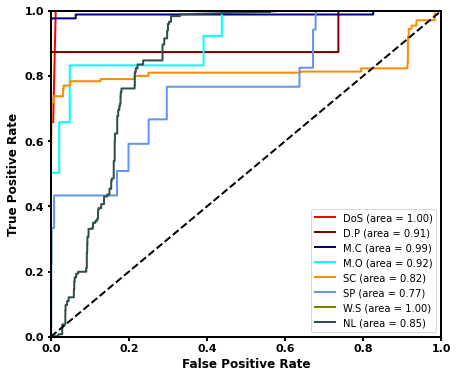

In [120]:
lw = 2
classes = ["DoS","D.P","M.C","M.O","SC","SP","W.S","NL"]
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
colors = cycle(['red','maroon','navy','aqua', 'darkorange', 'cornflowerblue','olive','darkslategray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_lr[i], tpr_lr[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc_lr[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=11,weight='bold')
plt.yticks(fontsize=11,weight='bold')
plt.setp(ax.spines.values(), linewidth=2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.xlabel('False Positive Rate',fontsize=12,weight='bold')
plt.ylabel('True Positive Rate',fontsize=12,weight='bold')
plt.legend(loc="lower right")
plt.savefig("ROC_of_Logistic_Regression")

# SVM

In [121]:
pipe_svc = pipe_svc.fit(X_train, y_train)
y_pred_train = pipe_svc.predict(X_train)
y_pred_test = pipe_svc.predict(X_test)

c:\users\rakesh reddy\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\rakesh reddy\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\rakesh reddy\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\rakesh reddy\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\rakesh reddy\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the

In [122]:
y_score_svc = pipe_svc.decision_function(X_test)

In [123]:
fpr_svc = dict()
tpr_svc = dict()
roc_auc_svc = dict()
for i in range(n_classes):
    fpr_svc[i], tpr_svc[i], _ = roc_curve(y_test[:, i], y_score_svc[:, i])
    roc_auc_svc[i] = auc(fpr_svc[i], tpr_svc[i])

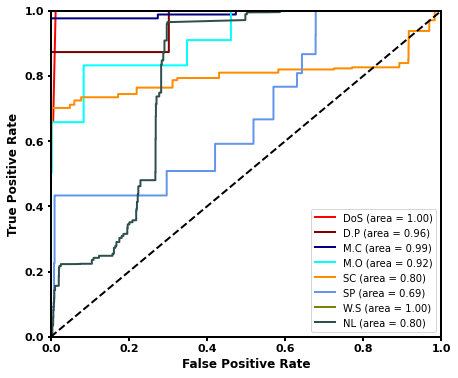

In [124]:
lw = 2
classes = ["DoS","D.P","M.C","M.O","SC","SP","W.S","NL"]
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
colors = cycle(['red','maroon','navy','aqua', 'darkorange', 'cornflowerblue','olive','darkslategray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_svc[i], tpr_svc[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc_svc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=11,weight='bold')
plt.yticks(fontsize=11,weight='bold')
plt.setp(ax.spines.values(), linewidth=2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.xlabel('False Positive Rate',fontsize=12,weight='bold')
plt.ylabel('True Positive Rate',fontsize=12,weight='bold')
plt.legend(loc="lower right")
plt.savefig("ROC_of_SVM")

# Decision Tree

In [125]:
pipe_tree = pipe_tree.fit(X_train, y_train)

In [126]:
y_score_tree = pipe_tree.predict_proba(X_test)
fpr_tree = dict()
tpr_tree = dict()
roc_auc_tree = dict()
for i in range(n_classes):
    fpr_tree[i], tpr_tree[i], _ = roc_curve(y_test[:, i], y_score_tree[:, i])
    roc_auc_tree[i] = auc(fpr_tree[i], tpr_tree[i])

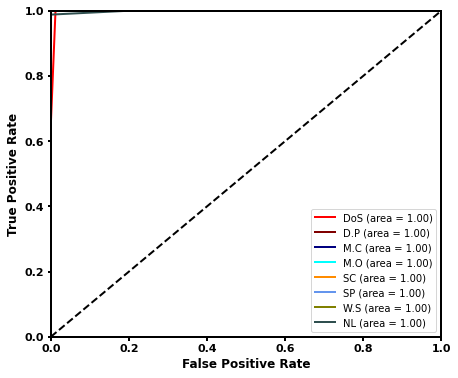

In [127]:
lw = 2
classes = ["DoS","D.P","M.C","M.O","SC","SP","W.S","NL"]
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
colors = cycle(['red','maroon','navy','aqua', 'darkorange', 'cornflowerblue','olive','darkslategray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_tree[i], tpr_tree[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc_tree[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=11,weight='bold')
plt.yticks(fontsize=11,weight='bold')
plt.setp(ax.spines.values(), linewidth=2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.xlabel('False Positive Rate',fontsize=12,weight='bold')
plt.ylabel('True Positive Rate',fontsize=12,weight='bold')
plt.legend(loc="lower right")
plt.savefig("ROC_of_Decision_Tree")

# Random Forest

In [128]:
pipe_rnd = pipe_rnd.fit(X_train, y_train)

In [129]:
y_score_rnd = pipe_rnd.predict_proba(X_test)
fpr_rnd = dict()
tpr_rnd = dict()
roc_auc_rnd = dict()
for i in range(n_classes):
    fpr_rnd[i], tpr_rnd[i], _ = roc_curve(y_test[:, i], y_score_rnd[:, i])
    roc_auc_rnd[i] = auc(fpr_rnd[i], tpr_rnd[i])

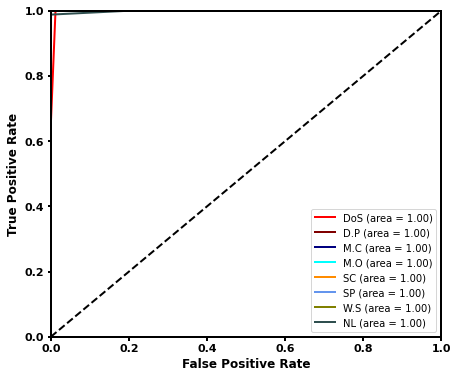

In [130]:
lw = 2
classes = ["DoS","D.P","M.C","M.O","SC","SP","W.S","NL"]
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
colors = cycle(['red','maroon','navy','aqua', 'darkorange', 'cornflowerblue','olive','darkslategray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_rnd[i], tpr_rnd[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc_rnd[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=11,weight='bold')
plt.yticks(fontsize=11,weight='bold')
plt.setp(ax.spines.values(), linewidth=2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.xlabel('False Positive Rate',fontsize=12,weight='bold')
plt.ylabel('True Positive Rate',fontsize=12,weight='bold')
plt.legend(loc="lower right")
plt.savefig("ROC_of_Random_Forrest")

# ANN

In [131]:
pipe_mlp = pipe_mlp.fit(X_train, y_train)

Iteration 1, loss = 0.01747635
Iteration 2, loss = 0.01242359
Iteration 3, loss = 0.01219138
Iteration 4, loss = 0.01213977
Iteration 5, loss = 0.01206942
Iteration 6, loss = 0.01195333
Iteration 7, loss = 0.01190263
Iteration 8, loss = 0.01188070
Iteration 9, loss = 0.01179250
Iteration 10, loss = 0.01184380
Iteration 11, loss = 0.01180049
Iteration 12, loss = 0.01182816
Iteration 13, loss = 0.01178547
Iteration 14, loss = 0.01173279
Iteration 15, loss = 0.01179253
Iteration 16, loss = 0.01172668
Iteration 17, loss = 0.01173873
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.00544625
Iteration 2, loss = 0.00202050
Iteration 3, loss = 0.00149718
Iteration 4, loss = 0.00114145
Iteration 5, loss = 0.00089673
Iteration 6, loss = 0.00071281
Iteration 7, loss = 0.00055928
Iteration 8, loss = 0.00044291
Iteration 9, loss = 0.00035870
Iteration 10, loss = 0.00029026
Iteration 11, loss = 0.00023988
Iteration 12, loss = 0.00021063


In [132]:
y_score_mlp = pipe_mlp.predict_proba(X_test)
fpr_mlp = dict()
tpr_mlp = dict()
roc_auc_mlp = dict()
for i in range(n_classes):
    fpr_mlp[i], tpr_mlp[i], _ = roc_curve(y_test[:, i], y_score_mlp[:, i])
    roc_auc_mlp[i] = auc(fpr_mlp[i], tpr_mlp[i])

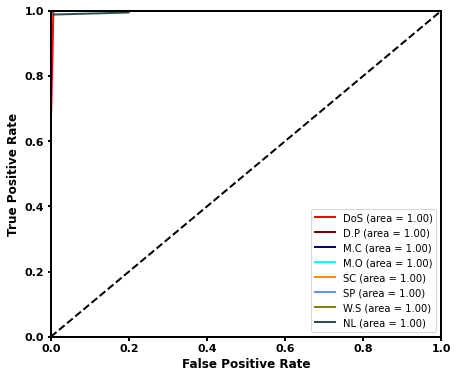

In [133]:
lw = 2
classes = ["DoS","D.P","M.C","M.O","SC","SP","W.S","NL"]
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
colors = cycle(['red','maroon','navy','aqua', 'darkorange', 'cornflowerblue','olive','darkslategray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_mlp[i], tpr_mlp[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc_mlp[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=11,weight='bold')
plt.yticks(fontsize=11,weight='bold')
plt.setp(ax.spines.values(), linewidth=2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.xlabel('False Positive Rate',fontsize=12,weight='bold')
plt.ylabel('True Positive Rate',fontsize=12,weight='bold')
plt.legend(loc="lower right")
plt.savefig("ROC_of_MLP")